In [3]:
from fastai.vision.all import *
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision import gan
from fastai.vision.gan import *

In [9]:
generator = basic_generator(64, n_channels=3, n_extra_layers=1)
critic    = basic_critic   (64, n_channels=3, n_extra_layers=1, act_cls=partial(nn.LeakyReLU, negative_slope=0.2))

NameError: name 'basic_generator' is not defined

In [12]:
dir(gan)

['APScoreBinary',
 'APScoreMulti',
 'AccumMetric',
 'ActivationStats',
 'Adam',
 'AdaptiveAvgPool',
 'AdaptiveConcatPool1d',
 'AdaptiveConcatPool2d',
 'AdaptiveGANSwitcher',
 'AdaptiveLoss',
 'AddChannels',
 'AddMaskCodes',
 'AffineCoordTfm',
 'Any',
 'ArrayBase',
 'ArrayImage',
 'ArrayImageBW',
 'ArrayImageBase',
 'ArrayMask',
 'AttrDict',
 'AttrGetter',
 'AutoInit',
 'AvgLoss',
 'AvgMetric',
 'AvgPool',
 'AvgSmoothLoss',
 'BBoxBlock',
 'BBoxLabeler',
 'BBoxLblBlock',
 'BCELossFlat',
 'BCEWithLogitsLossFlat',
 'BILINEAR',
 'BalancedAccuracy',
 'BaseLoss',
 'BatchNorm',
 'BatchNorm1dFlat',
 'BatchSampler',
 'BnFreeze',
 'BrierScore',
 'BrierScoreMulti',
 'Brightness',
 'BuiltinFunctionType',
 'BuiltinMethodType',
 'BypassNewMeta',
 'ByteTensor',
 'CSVLogger',
 'Callable',
 'Callback',
 'CancelBackwardException',
 'CancelBatchException',
 'CancelEpochException',
 'CancelFitException',
 'CancelStepException',
 'CancelTrainException',
 'CancelValidException',
 'CastToTensor',
 'Cat',
 'Ca

In [19]:
critic = basic_critic(in_size=64, n_channels=3)

In [20]:
generator = basic_generator(out_size=64, n_channels=3)

In [22]:
tst = GANModule(critic=critic, generator=generator)

In [23]:
real = torch.randn(2, 3, 64, 64)
real_p = tst(real)
test_eq(real_p.shape, [2,1])

In [24]:
tst.switch() #tst is now in generator mode

In [25]:
noise = torch.randn(2, 100)
fake = tst(noise)
test_eq(fake.shape, real.shape)

In [15]:
bs = 8
size = 64

In [34]:
dblock = DataBlock(blocks = (TransformBlock, ImageBlock),
                   get_x = generate_noise,
                   get_items = get_image_files,
                   splitter = IndexSplitter([]),
                   item_tfms=Resize(size, method=ResizeMethod.Crop), 
#                    batch_tfms = Normalize.from_stats(torch.tensor([0.5,0.5,0.5]), torch.tensor([0.5,0.5,0.5]))
                  )

In [35]:
path = r"E:\Work\Data_Science\Projects\Custom_GAN\data\z6c0mek1peq4cdfn4yeyr\images.cv_z6c0mek1peq4cdfn4yeyr\data\train\house"

In [36]:
dls = dblock.dataloaders(path, path=path, bs=bs)

TypeError: 'NoneType' object is not iterable

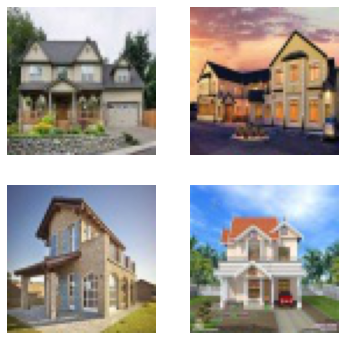

In [19]:
dls.show_batch(max_n=4)

In [20]:
generator = basic_generator(64, n_channels=3, n_extra_layers=1)
critic    = basic_critic   (64, n_channels=3, n_extra_layers=1, act_cls=partial(nn.LeakyReLU, negative_slope=0.2))

In [21]:
learn = GANLearner.wgan(dls, generator, critic, opt_func = RMSProp)

In [22]:
learn.recorder.train_metrics=True
learn.recorder.valid_metrics=False

In [28]:
learn.fit(100, 2e-4, wd=0.)

epoch,train_loss,gen_loss,crit_loss,time
0,-1.126649,0.607886,-1.471551,00:01
1,-1.083292,0.690722,-1.472109,00:01
2,-1.070177,0.679312,-1.468387,00:01
3,-1.065156,0.673503,-1.468967,00:01
4,-1.061124,0.675527,-1.465340,00:01
5,-1.060989,0.679119,-1.470858,00:01
6,-1.061299,0.679085,-1.472649,00:01
7,-1.061626,0.679779,-1.473848,00:01
8,-1.061928,0.676780,-1.473845,00:01
9,-1.062053,0.677703,-1.473469,00:01


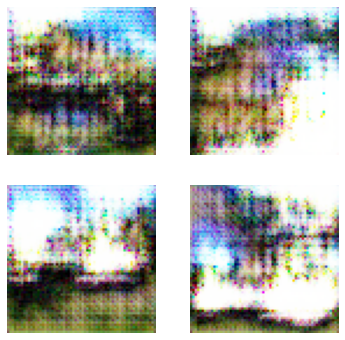

In [29]:
learn.show_results(max_n=4, ds_idx=0)

In [38]:
learner.show_results(max_n=4, ds_idx=0)

NameError: name 'learner' is not defined